# Dataset Load

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_names']= iris.target_names[df['target']]
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
96,5.7,2.9,4.2,1.3,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica
41,4.5,2.3,1.3,0.3,0,setosa
13,4.3,3.0,1.1,0.1,0,setosa
105,7.6,3.0,6.6,2.1,2,virginica


In [ ]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df['petal length (cm)']=(df['petal length (cm)']-df['petal length (cm)'].min())/(df['petal length (cm)'].max()-df['petal length (cm)'].min())
df['petal width (cm)']=(df['petal width (cm)']-df['petal width (cm)'].min())/(df['petal width (cm)'].max()-df['petal width (cm)'].min())
df['sepal length (cm)']=(df['sepal length (cm)']-df['sepal length (cm)'].min())/(df['sepal length (cm)'].max()-df['sepal length (cm)'].min())
df['sepal width (cm)']=(df['sepal width (cm)']-df['sepal width (cm)'].min())/(df['sepal width (cm)'].max()-df['sepal width (cm)'].min())

# Visualization

In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sepal width (cm)')

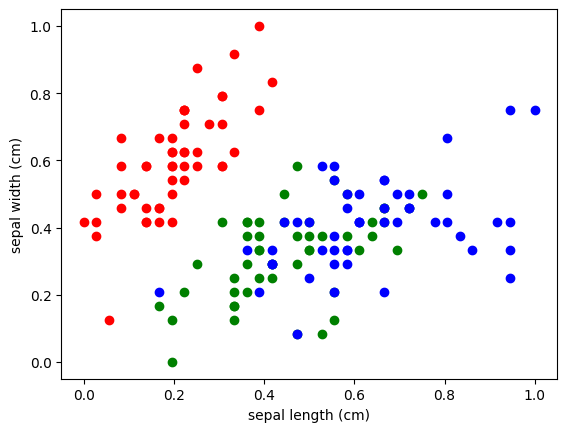

In [ ]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

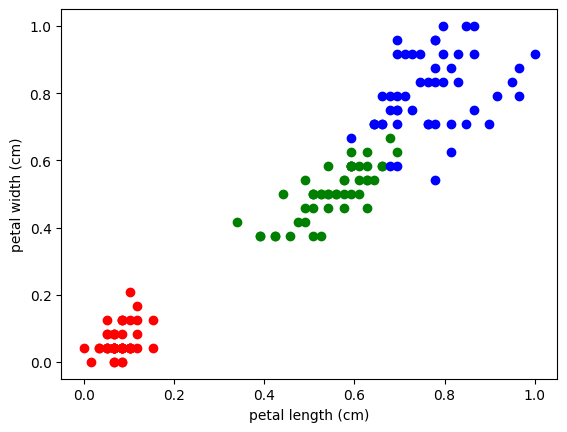

In [ ]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target', 'flower_names'], axis='columns'), df.target, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

1.0

In [ ]:
knn.predict([[4.8, 3.0, 1.5, 2.3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
from sklearn.metrics import confusion_matrix # Changed 'matrics' to 'metrics'

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

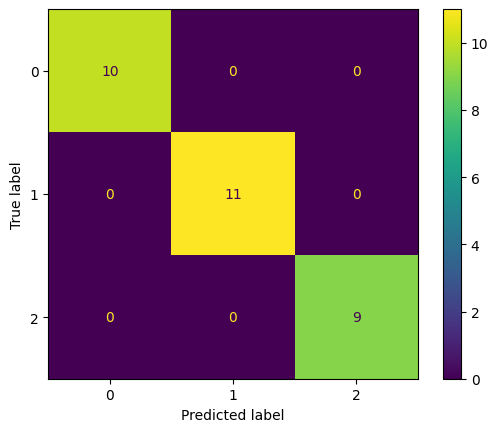

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



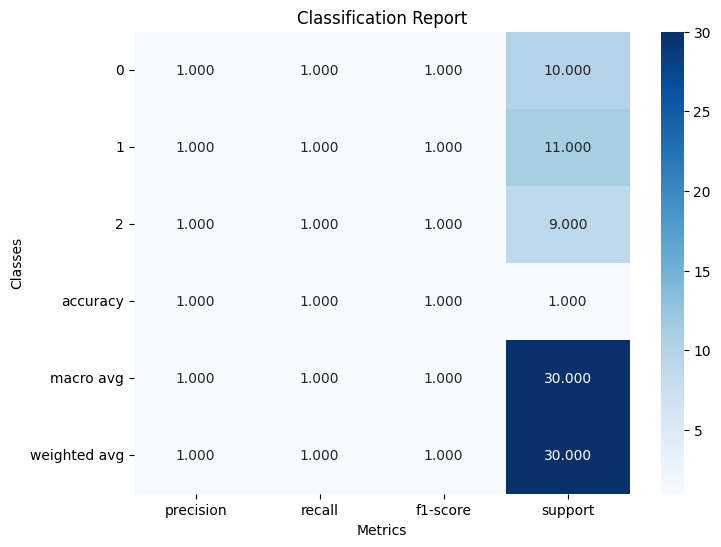

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


In [ ]:
import numpy as np

In [ ]:
error=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i!=y_test))

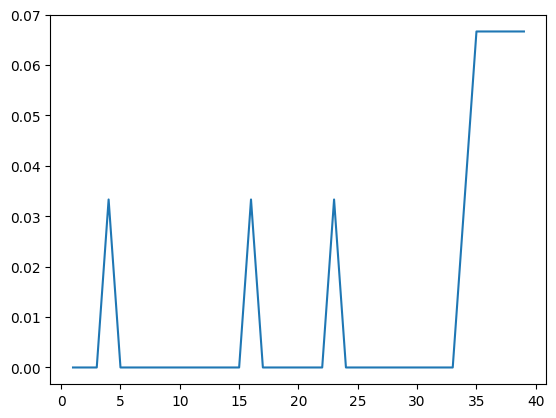

In [ ]:
plt.plot(range(1,40),error)